In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

## 1) Carregar os dados de treinamento e teste

In [2]:
# Carregar os dados de treinamento e teste
X_train = pd.read_csv('../Dados/ModelosSimples/X_train.csv')
y_train = pd.read_csv('../Dados/ModelosSimples/y_train.csv')
X_test = pd.read_csv('../Dados/ModelosSimples/X_test.csv')
y_test = pd.read_csv('../Dados/ModelosSimples/y_test.csv')

# Converter y_train e y_test em vetores 1D
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

## 2) Treinando modelo 

In [3]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Teste diferentes critérios de divisão
    'max_depth': [None, 10, 20, 30],  # Teste diferentes profundidades máximas da árvore
    'min_samples_split': [2, 4, 5, 10],  # Teste diferentes valores mínimos para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Teste diferentes valores mínimos para folhas
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 5, 10]},
             return_train_score=True, scoring='accuracy')

### 2.1) Tabela comparativa para todas combinações

In [4]:
results = grid_search.cv_results_
param_combinations = [f'{params}' for params in grid_search.cv_results_['params']]
train_scores = results['mean_train_score']
test_scores = results['mean_test_score']

table_data = []

for i in range(len(param_combinations)):
    row = [i+1, param_combinations[i], train_scores[i], test_scores[i]]  
    table_data.append(row)

table = tabulate(table_data, headers=['Combinação', 'Hiperparâmetros', 'Train Score', 'Validation Score'], tablefmt='fancy_grid', numalign='left')

print(table)

╒══════════════╤═════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════╤════════════════════╕
│ Combinação   │ Hiperparâmetros                                                                             │ Train Score   │ Validation Score   │
╞══════════════╪═════════════════════════════════════════════════════════════════════════════════════════════╪═══════════════╪════════════════════╡
│ 1            │ {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}     │ 1             │ 0.994286           │
├──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┼───────────────┼────────────────────┤
│ 2            │ {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4}     │ 1             │ 0.994286           │
├──────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┼──

## 3) Predição

In [5]:
best_decision_tree = grid_search.best_estimator_
y_pred = best_decision_tree.predict(X_test)

## Matriz Confusão

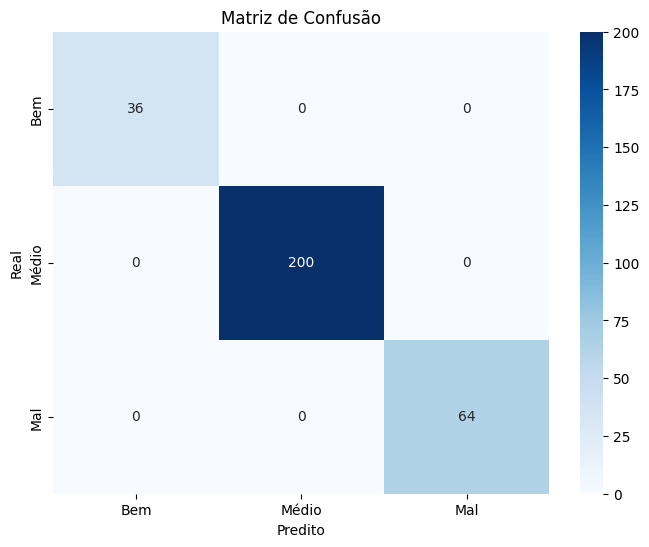

In [6]:
cm = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## Métricas de eficácia

In [7]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia: {accuracy}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

# precision = precision_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Precisão: {precision}')

# recall = recall_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Recall: {recall}')

# f1 = f1_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
----------------------------------------------------------------

Acurácia: 1.0
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       1.00      1.00      1.00        36
         Mal       1.00      1.00      1.00       200
       Médio       1.00      1.00      1.00        64

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

